# Hypohtesis Testing 

*Hypothesis* testing is a statistical tool to test an assumption regarding the population parameter.The methodology employed in statistical testing dpends on the nature of dataset used and the reason for the analysis.So,hypothesis testing is used to infer the result of a hypothesis performed on the sample data frpm a larger population.This notebook is dedicated towards hypothesis testing.In this notebook ,we'll discuss about the types of testing ,especially *Z-test* and *T-test*


### Basic Teminology in Hypothesis testing:
1.Null and alternate hypothesis
2.p value
3.Significance level
4.Confidence level
5.Type I and Type II error
6.Decision Criteria

### We would like to focus on Z and T tests

## Z test:
We considered healthcare as the domain and this Z test helps us to find out the answers for few questions.Before moving on,let's import few libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

### Reading the data from the csv files.

In [18]:
import pandas as pd
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Statistical Test

### a.From the dataset we use Z-test to check whether the charges of people who smoke differ significantly from the people who don't?
 As per CLT regrardless of distribution of the population the sample mean is same as population mean and the sample standard deviation is std/sqrt(sample size)
### Ho (Null): The charges across smoker and non-smokers are equal
### Ha (Alternative) : The charges across smoker and non-smokers are unequal

In [21]:
from statsmodels.stats.weightstats import ztest

sample1 = data.loc[data.smoker == 'yes', 'expenses']
sample2 = data.loc[data.smoker =='no', 'expenses']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 46.665
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


### Performing two sample T-test

In [22]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 46.665
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


### As the p-value is close to zero it can concluded that the charges are significantly different from a smoker to a non-smoker
b. Does bmi of males differ significantly from that of females
To answer the above question we shall use Z-test.
### Ho (Null): The charges BMI across gender are equal
### Ha (Alternative) : The BMI across gender are unequal

In [23]:
sample1 = data.loc[data.sex == 'male', 'bmi']
sample2 = data.loc[data.sex =='female', 'bmi']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 1.697
	 Since the p-value, 0.08968 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


### Perfoming two sample T-test

In [24]:
test_statistic, p_value = ttest_ind(sample1, sample2)

print('test_statistic:',round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 1.697
	 Since the p-value, 0.08991 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


### As the p-value is greater than 0.05 it can be concluded that there is no significant difference in bmi between geneder
c. Is the proportion of smokers significantly different in different genders
To answer the above question we shall use Z-test of proprtion.
### Ho (Null): The proportion of smokers is the same in both categories - males and females
### Ha (Alternative) : The proportion of smokers is significantly different in both categories - males and females

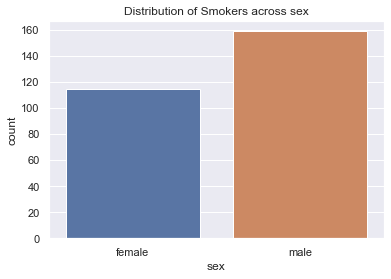

In [25]:
smoker=data['smoker']=="yes"
smoker=data[smoker]
smoker.shape
smoker.head()
pd.crosstab(smoker['smoker'],smoker['sex'])
sns.countplot(smoker['sex'])
plt.title("Distribution of Smokers across sex");

### Proprtion of male smokers seems to be higher than female smoker

In [28]:
male=smoker.sex.value_counts()[:1].sum()
female=smoker.sex.value_counts()[1:].sum()
total=smoker.sex.value_counts().sum()

In [29]:
male/total,female/total

(0.5802919708029197, 0.4197080291970803)

In [30]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([male, female],[total])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.00017 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis
